**Question 1**

In [ ]:
from scipy.stats import norm as gaussian
import math
import numpy as np

def get_normal_probability(X, mean, var):
  expr1 = np.exp( - np.square(X - mean)/( 2 * var ))
  expr2 = 1/np.sqrt(2 * math.pi * var)
  probability = (expr1 * expr2)
  return probability

def get_val_of_numerator(x,m1=20,std1=10,m2=50,std2=5,m3=80,std3=20):
  return (get_normal_probability(x,m1,std1*std1) + get_normal_probability(x,m2,std2*std2) + get_normal_probability(x,m3,std3*std3))

In [ ]:
def get_reasonable_val_of_M(num_of_sample=20000):
  x = np.random.uniform(-100, 150, num_of_sample)
  p_tilda_x = get_val_of_numerator(x)
  q_x = get_normal_probability(x,50,30*30)
  div = p_tilda_x / q_x
  M = np.amax(div)
  return M

M = get_reasonable_val_of_M(num_of_sample=30000)
print(F"The reasonable value for M is {round(M,4)}.")

The reasonable value for M is 6.5218.


In [ ]:
def get_samples_with_rejection_sampling(M,required_num_of_samples=10000):
  required_num_of_samples = 10000
  accepted_sample_count = 0
  rejected_sample_count = 0
  accepted_sample_list = []
  while accepted_sample_count < required_num_of_samples:
      x = np.random.normal(loc = 50, scale = 30, size = 1)
      u = np.random.uniform(0, M * get_normal_probability(x,50,30*30))
      if u < get_val_of_numerator(x):
          accepted_sample_list.append(x)
          accepted_sample_count += 1
      else:
        rejected_sample_count += 1
  return accepted_sample_list, accepted_sample_count, rejected_sample_count

# Plotting
import matplotlib.pyplot as plt

def display_plot(M,required_num_of_samples=10000):
  accepted_sample_list, accepted_sample_count, rejected_sample_count = get_samples_with_rejection_sampling(M,required_num_of_samples=10000)
  rejection_rate = 100 * (rejected_sample_count/(accepted_sample_count + rejected_sample_count))
  acceptance_rate = 100 * (accepted_sample_count/(accepted_sample_count + rejected_sample_count))
  x = np.linspace(start=-100, stop=200, num=10000)
  p_tilda = get_val_of_numerator(x)
  q = get_normal_probability(x,50,30*30)
  plt.figure(figsize=(15, 10))
  plt.text(110,0.07,F"M={round(M,2)} with Acceptance Rate {round(acceptance_rate,2)}%")
  plt.plot(x, p_tilda,label = r'$\tilde{p}(x)$',color="teal")
  plt.plot(x, M * q, label = r'$q(x)$',color="red")
  plt.xlabel('X Values')
  plt.ylabel('Y Values')
  plt.title("Plot of Rejection Sampler.")
  plt.legend()
  plt.show()

  plt.figure(figsize=(15, 10))
  plt.hist(np.array(accepted_sample_list), bins = 150,color="darkgreen")
  plt.title('Histogram of Sampled Points')
  plt.show()

  print(F"Number of accepted samples is {len(accepted_sample_list)}.")
  print(F"Number of rejected samples is {rejected_sample_count}.")
  print(F"Rejection rate is {round(rejection_rate,2)}%")
  print(F"Acceptance rate is {round(acceptance_rate,2)}%")
  print(F"The chosen value for M is {round(M,4)}.")


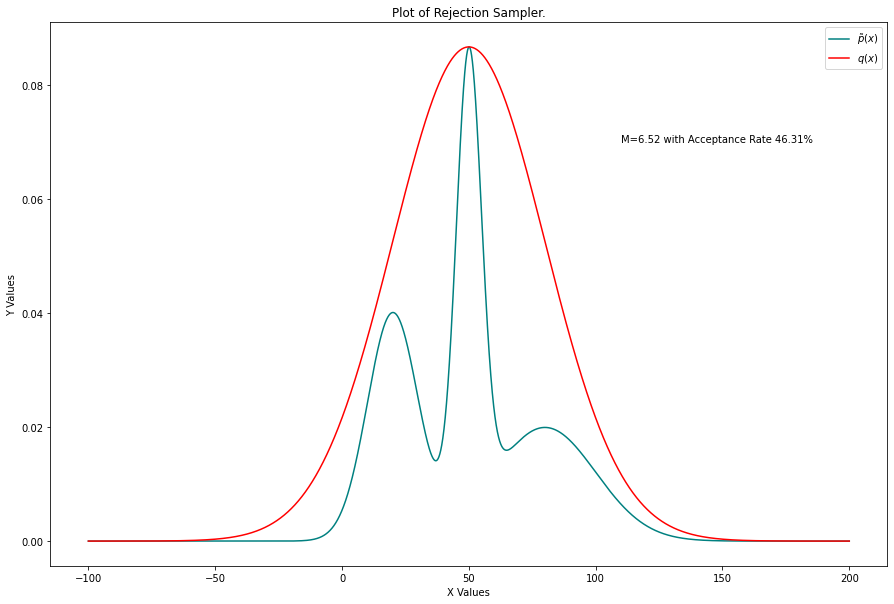

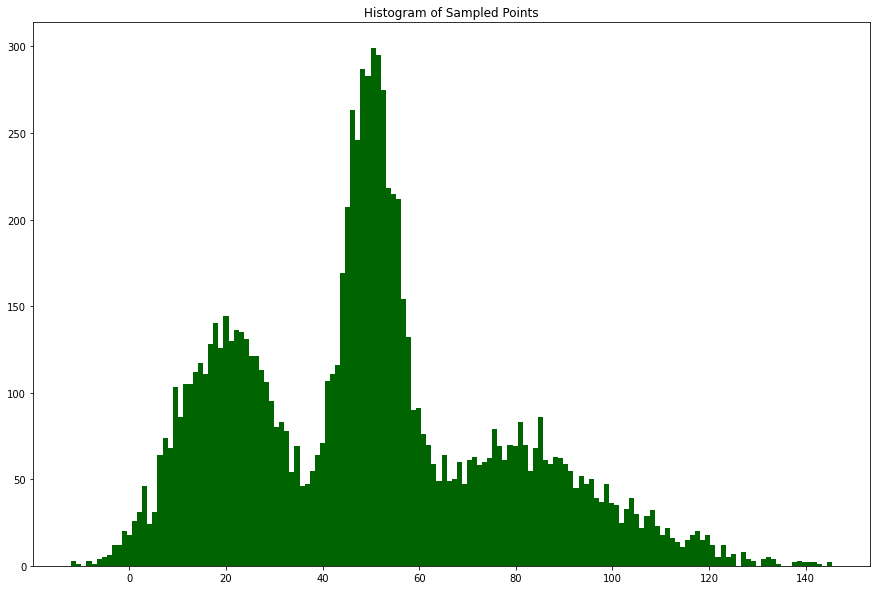

Number of accepted samples is 10000.
Number of rejected samples is 11595.
Rejection rate is 53.69%
Acceptance rate is 46.31%
The chosen value for M is 6.5218.


In [ ]:
display_plot(M,required_num_of_samples=10000)

In [1]:
M = 2
display_plot(M,required_num_of_samples=10000)

NameError: name 'display_plot' is not defined

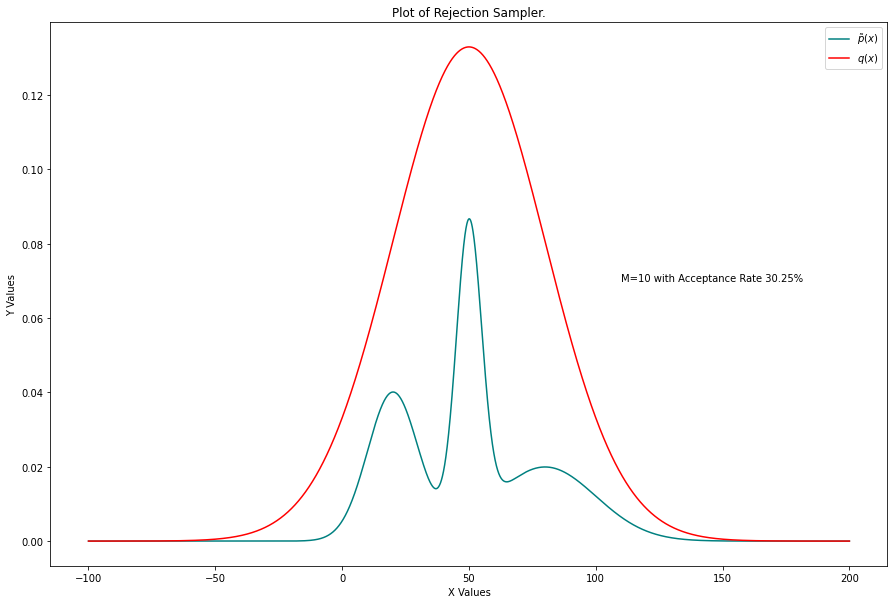

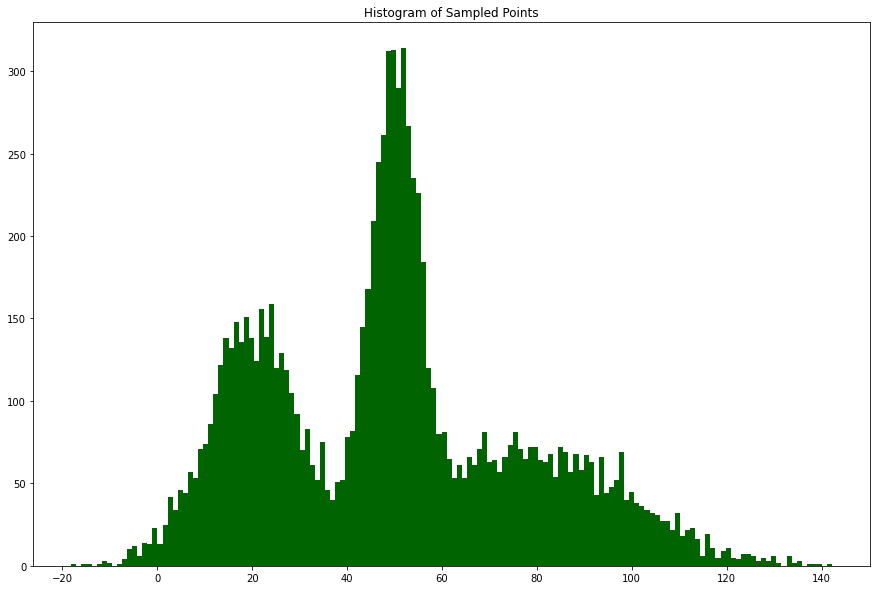

Number of accepted samples is 10000.
Number of rejected samples is 23054.
Rejection rate is 69.75%
Acceptance rate is 30.25%
The chosen value for M is 10.


In [ ]:
M = 10
display_plot(M,required_num_of_samples=10000)

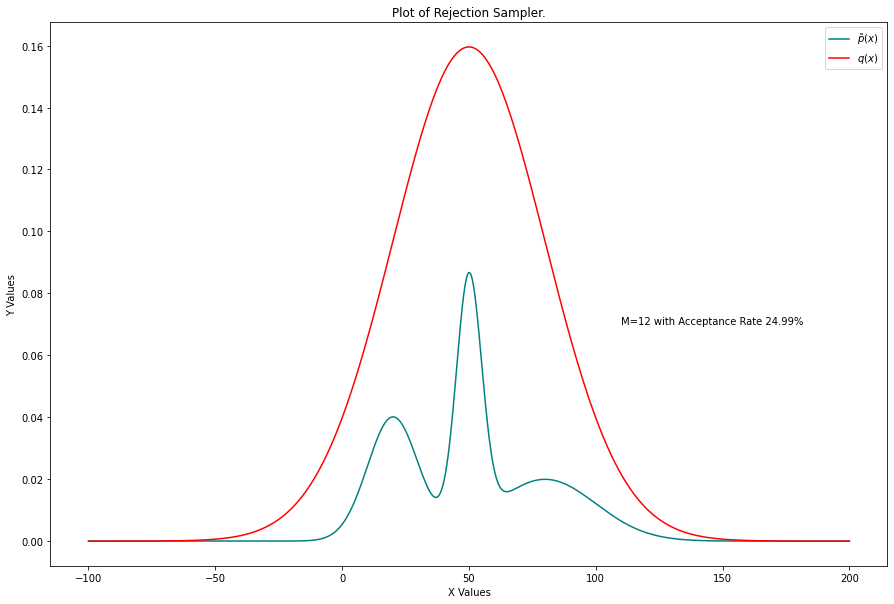

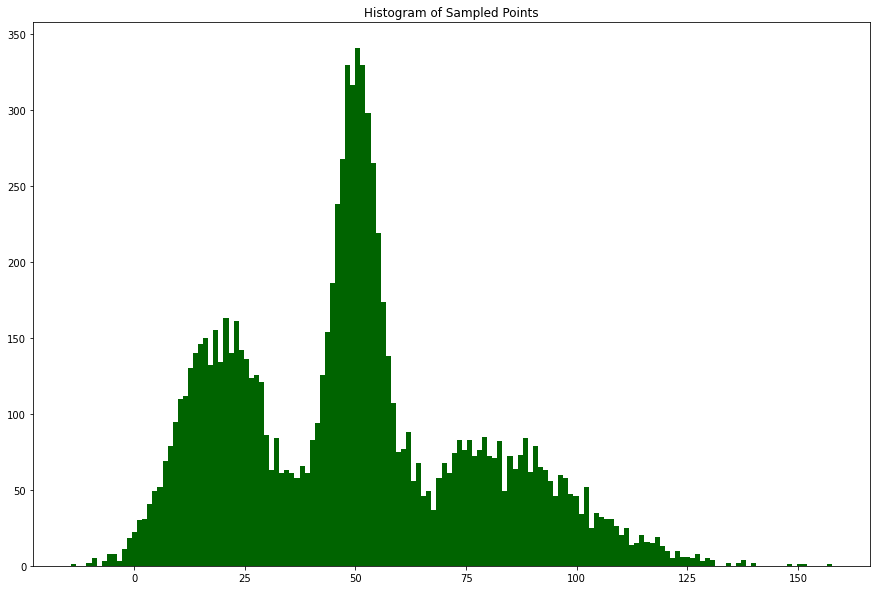

Number of accepted samples is 10000.
Number of rejected samples is 30016.
Rejection rate is 75.01%
Acceptance rate is 24.99%
The chosen value for M is 12.


In [ ]:
M = 12
display_plot(M,required_num_of_samples=10000)

With the reasonable value of M as 6.5218 the acceptance rate is 46.25%

As we increase the value of M the acceptance rate will drop.

For one of the random iteration the values looked like:

M=6.5218, Acceptance rate = 46.25%

M=8, Acceptance rate = 37.68%

M=10, Acceptance rate = 29.76%

M=12, Acceptance rate = 25.21%

**Question 2**

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal as mv_gaussian

def get_empirical_mean_variance(sample_list, number_of_samples):
  mean = np.mean(sample_list, axis = 0)
  cov = (1 / number_of_samples) * np.dot(np.transpose(sample_list - mean), (sample_list - mean))
  return (mean, cov)

def plot_scatter(samples, variance, use_sample=100, N=200):
  X = np.linspace(0,10, N)
  Y = np.linspace(0,10, N)
  X, Y = np.meshgrid(X, Y)
  pos  = np.dstack((X, Y))
  Z = mv_gaussian.pdf(pos,mean=[4,4],cov=[[1, 0.8], [0.8, 1]])
  CS = plt.contour(X, Y, Z, 1,colors="blue")
  plt.scatter(samples[0:use_sample, 0], samples[0:use_sample, 1], label = 'Samples',color="red")
  mean, cov = get_empirical_mean_variance(samples[0:use_sample, :], use_sample)
  Z = mv_gaussian.pdf(pos,mean=mean,cov=cov)
  CS1 = plt.contour(X, Y, Z, 1,colors="lime")
  CS.collections[0].set_label("P(X)")
  CS1.collections[0].set_label(r'$\tilde{p}(x)$')
  plt.title(F'Plot for {use_sample} samples with variance {variance}.')
  plt.legend()
  plt.show()


def MH_Sampler(variance=0.1,num_of_samples_required = 110,burning_steps = 300, thinning_steps = 10):
  burning_steps_count = 0
  thinning_steps_count = 0
  sample_count = 0
  collected_sample_count = 0
  collected_sample_list = []
  #variance = 0.01
  cov = np.array([[variance,0],[0,variance]])
  cov_t = np.array([[1, 0.8], [0.8, 1]])
  mean_t = np.array([4,4])
  z_l = np.random.rand(2)
  while collected_sample_count < num_of_samples_required:
    z_star = np.random.multivariate_normal(z_l, cov)
    u = np.random.uniform(0,1)
    target_z_star_prob = mv_gaussian.pdf(z_star,mean=mean_t,cov=cov_t)
    target_Z_l_prob = mv_gaussian.pdf(z_l,mean=mean_t,cov=cov_t)
    accept_prob = np.minimum(1,(target_z_star_prob/target_Z_l_prob))
    if u < accept_prob:
      thinning_steps_count += 1
      if (sample_count >= burning_steps) and (thinning_steps_count >= thinning_steps):
        collected_sample_list.append(z_star)
        collected_sample_count += 1
        thinning_steps_count = 0
      z_l = z_star
    sample_count += 1
  rejection_rate = round(((sample_count - collected_sample_count)/sample_count),4)
  collected_sample_list = np.array(collected_sample_list)
  return collected_sample_list, rejection_rate * 100


For the varaince 0.01 the plots are...



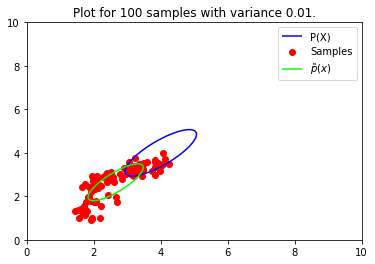

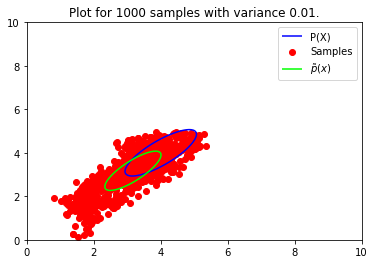

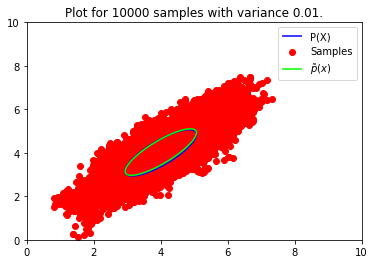


Rejection Rate is 81.66%.

For the varaince 1 the plots are...



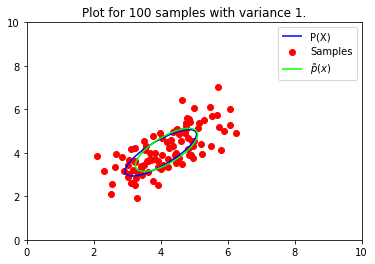

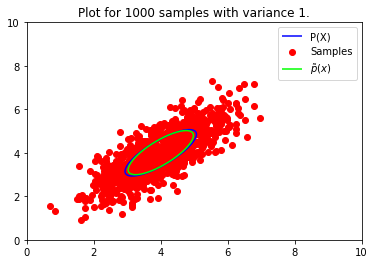

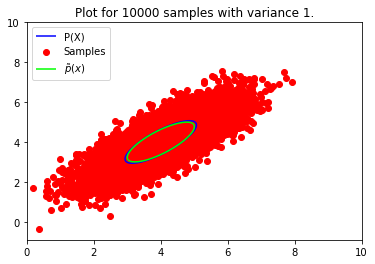


Rejection Rate is 91.94%.

For the varaince 100 the plots are...



KeyboardInterrupt: ignored

In [ ]:
variance_list = [0.01,1,100]
sample_count_list = [100,1000,10000]
for ele in variance_list:
  print(F"\nFor the varaince {ele} the plots are...\n")
  collected_sample_list, rejection_rate = MH_Sampler(variance=ele,num_of_samples_required = 10000,burning_steps = 100, thinning_steps = 5)
  for val in sample_count_list:
    plot_scatter(collected_sample_list, ele, use_sample=val, N=200)
  print(F"\nRejection Rate is {round(rejection_rate,2)}%.")

Looking at plots the proposal distribution with variance 1 seems the best choice. The rejection rate is higher with higher variance. With variance 0.1 the rejection rate is 81.62%, with variance 1 the rejction rate is 91.96% and with variance 100 the rejection rate is 99.77%.